In [30]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import os
%pylab inline
pylab.rcParams['figure.figsize'] = (32, 18)


Populating the interactive namespace from numpy and matplotlib


In [50]:
# initialize COCO api for instance annotations
annotation_file = "../datasets/annotations/Mold_test_coco_annotation.json"
data_dir = "../datasets"
target_category = ["base", "hook", "ucut", "boss"]
coco = COCO(annotation_file)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [51]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
hook ucut boss

COCO supercategories: 
shape


In [52]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=nms);
imgIds = coco.getImgIds(catIds=catIds);


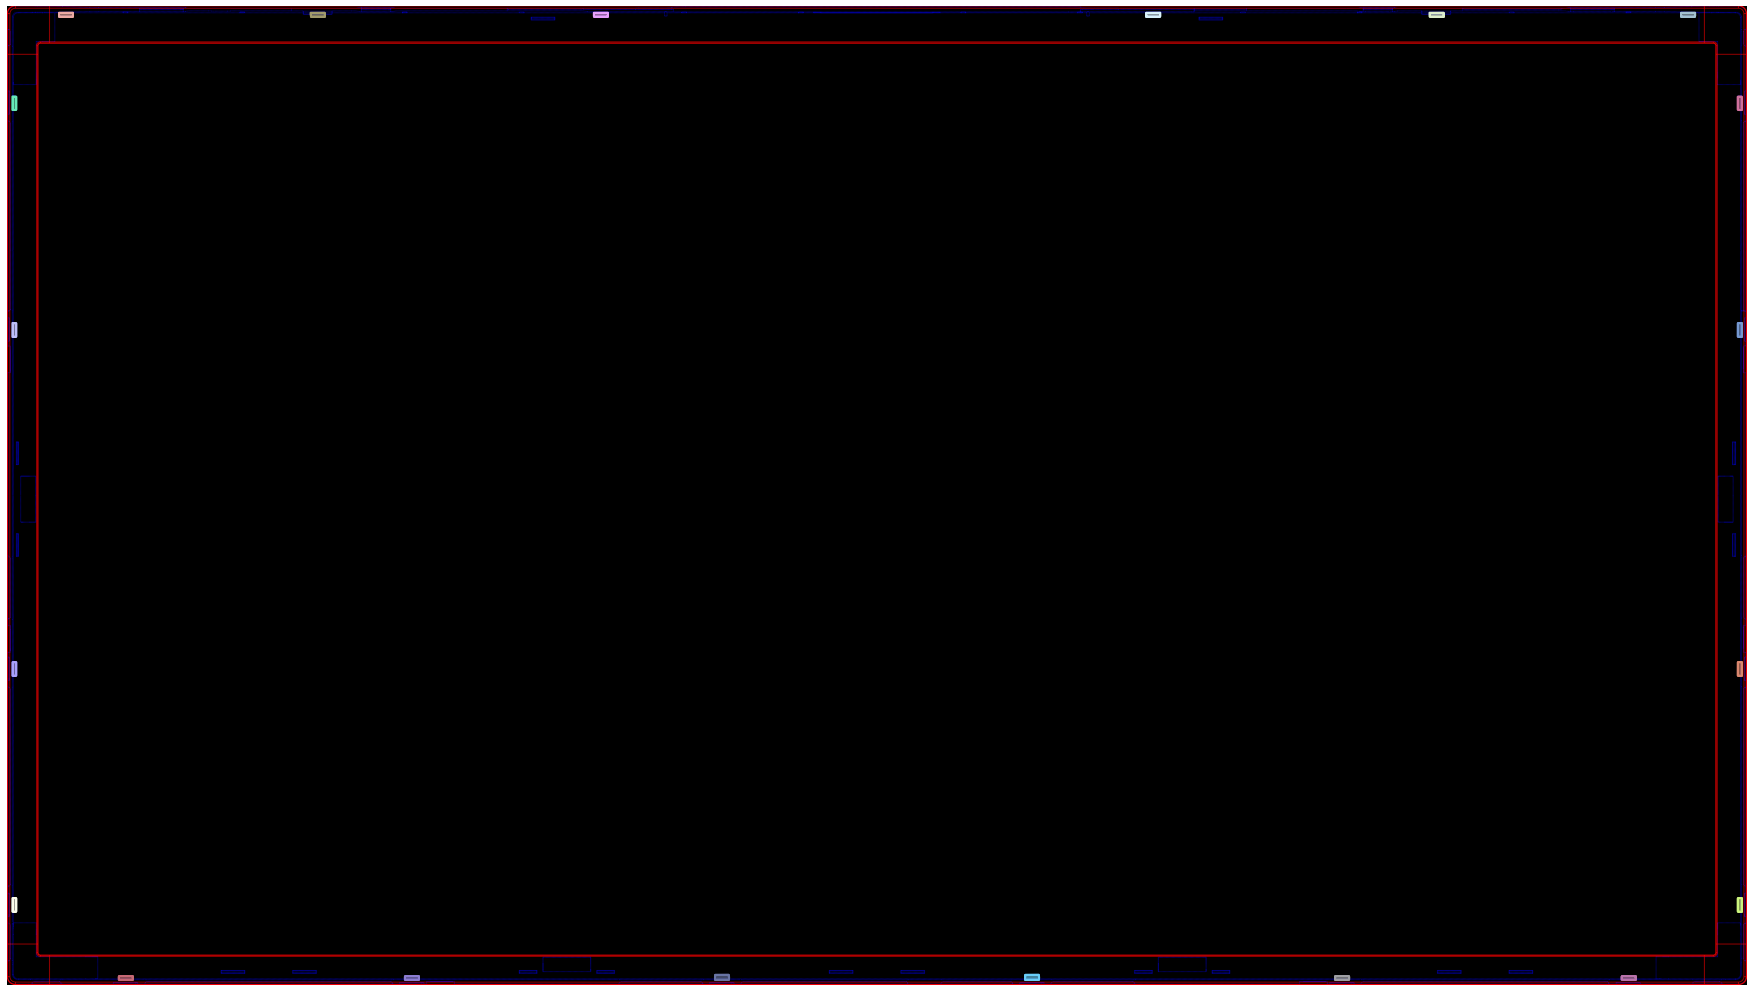

In [53]:
# load and display instance annotations
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
I = io.imread(os.path.join(data_dir,img['file_name']))
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns, draw_bbox=True)

In [46]:
# check the image 
from tqdm import tqdm
for img_id in tqdm(imgIds):
    img = coco.loadImgs(img_id)[0]
    I = io.imread(os.path.join(data_dir,img['file_name']))

100%|██████████| 138/138 [03:46<00:00,  1.64s/it]
